In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
dataset = pd.read_excel('dataset_1sec_teste.xlsx')

y = dataset['diagnostico_bin']
X = dataset.drop(['diagnostico', 'diagnostico_bin',
                 'cod_exame', 'id_paciente'], axis=1)

Text(0.5, 0, 'Permutation Importance')

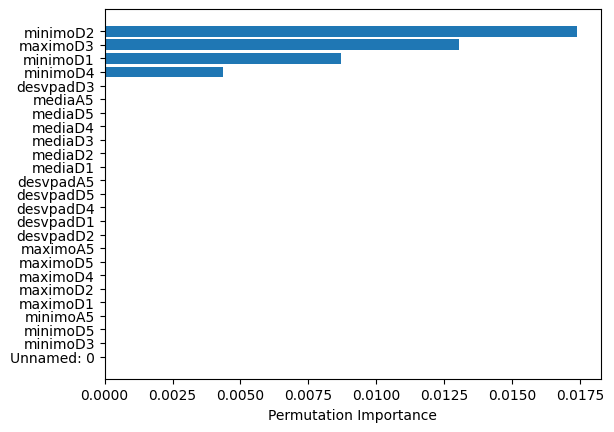

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
balanceamento = {1: 1.8, 0: 1}

svc = svm.SVC(kernel='poly', class_weight=balanceamento)
svc.fit(X_train, y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

features = np.array(list(X.columns))

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")